In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
# status initialize

import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

with tf.Graph().as_default():
  gpu_options = tf.GPUOptions(allow_growth=True)


In [3]:
import os
import random
import fnmatch
import datetime
import pickle
import numpy as np
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

'''import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)'''

import pandas as pd
import tensorflow as tf
import tensorflow.keras

print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print('tf.__version__:', tf.__version__)
print('keras__version__:', tf.keras.__version__)

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#import colab
#from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mping
from PIL import Image


1.15.0
tf.__version__: 1.15.0
keras__version__: 2.2.4-tf


image_paths ['crop_img\\train_00000_000.png', 'crop_img\\train_00001_002.png', 'crop_img\\train_00002_000.png', 'crop_img\\train_00003_002.png', 'crop_img\\train_00004_000.png', 'crop_img\\train_00005_002.png', 'crop_img\\train_00006_002.png', 'crop_img\\train_00007_002.png', 'crop_img\\train_00008_002.png', 'crop_img\\train_00009_002.png', 'crop_img\\train_00010_002.png', 'crop_img\\train_00011_000.png', 'crop_img\\train_00012_001.png', 'crop_img\\train_00013_000.png', 'crop_img\\train_00014_001.png', 'crop_img\\train_00015_001.png', 'crop_img\\train_00016_001.png', 'crop_img\\train_00017_001.png', 'crop_img\\train_00018_001.png', 'crop_img\\train_00019_000.png', 'crop_img\\train_00020_001.png', 'crop_img\\train_00021_001.png', 'crop_img\\train_00022_001.png', 'crop_img\\train_00023_001.png', 'crop_img\\train_00024_001.png', 'crop_img\\train_00025_000.png', 'crop_img\\train_00026_001.png', 'crop_img\\train_00027_001.png', 'crop_img\\train_00028_001.png', 'crop_img\\train_00029_001.png

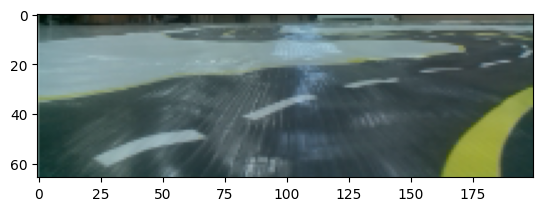

In [4]:
data_dir = "crop_img"
file_list = os.listdir(data_dir)
image_paths = []
steering_angles = []
pattern ="*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir, filename))
        angle = int(filename[-7:-4])
        steering_angles.append(angle)
print('image_paths', image_paths)
print('steering_angles', steering_angles)
image_index = 1
plt.imshow(Image.open(image_paths[image_index]))
print("image_path: ", image_paths[image_index])
print("steering_Angle: ", steering_angles[image_index])
df = pd.DataFrame()
df['ImagePath'] = image_paths
df['Angle'] = steering_angles

[4605    0    0    0    0  737    0    0    0  773]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


(array([4605.,    0.,    0.,    0.,    0.,  737.,    0.,    0.,    0.,
         773.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

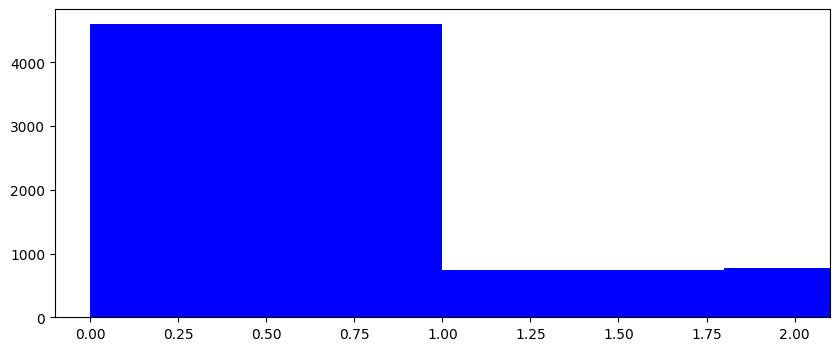

In [5]:
num_of_bins = 10
hist, bins = np.histogram(df['Angle'], num_of_bins)
print(hist)
print(bins)
fig, axes = plt.subplots(1,1,figsize=(10,4))
axes.hist(df['Angle'], bins=num_of_bins, width=1, color='blue')

In [6]:
'''s = np.array(steering_angles)
angle0=np.where(s==0)
print(angle0)
angle0=np.where(s==45)
print(angle0)
angle0=np.where(s==90)
print(angle0)
angle0=np.where(s==135)
print(angle0)'''

s = np.array(steering_angles)
new_angles = np.copy(steering_angles)
new_angles[np.where(s==0)] = 0
new_angles[np.where(s==45)] = 1
new_angles[np.where(s==135)] = 2
print(new_angles)
print(steering_angles)
print(len(np.where(new_angles==0)[0]))
print(len(np.where(new_angles==1)[0]))
print(len(np.where(new_angles==2)[0]))
#print(len(new_angles))
df['Angle'] = new_angles

[0 2 0 ... 0 0 0]
[0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Training data: 4892, Validation data : 1223


Text(0.5, 1.0, 'Validation data')

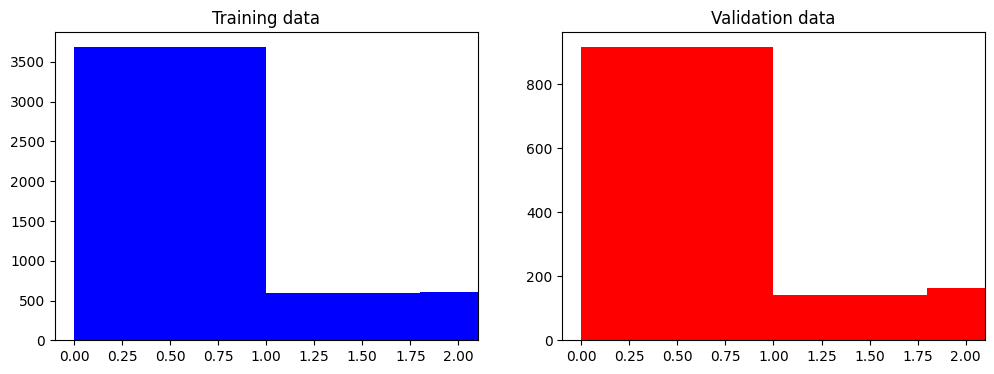

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, new_angles, test_size=0.2)
print("Training data: {}, Validation data : {}".format(len(X_train), len(X_valid)))

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title("Training data")
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title("Validation data")

In [8]:
for a, b in zip(X_train, y_train):
    print(a,b)

crop_img\train_02187_000.png 0
crop_img\train_00520_000.png 0
crop_img\train_05569_000.png 0
crop_img\train_02730_001.png 1
crop_img\train_03458_000.png 0
crop_img\train_03293_002.png 2
crop_img\train_05462_000.png 0
crop_img\train_03052_000.png 0
crop_img\train_05877_000.png 0
crop_img\train_05730_000.png 0
crop_img\train_04383_000.png 0
crop_img\train_03882_000.png 0
crop_img\train_00148_000.png 0
crop_img\train_01452_000.png 0
crop_img\train_05610_001.png 1
crop_img\train_00577_000.png 0
crop_img\train_02367_001.png 1
crop_img\train_01082_000.png 0
crop_img\train_05511_000.png 0
crop_img\train_02008_000.png 0
crop_img\train_03612_001.png 1
crop_img\train_04375_001.png 1
crop_img\train_04825_000.png 0
crop_img\train_04555_000.png 0
crop_img\train_04987_000.png 0
crop_img\train_05633_001.png 1
crop_img\train_02316_000.png 0
crop_img\train_03198_000.png 0
crop_img\train_06107_000.png 0
crop_img\train_00889_000.png 0
crop_img\train_05446_001.png 1
crop_img\train_05520_000.png 0
crop_img

(66, 200, 3)


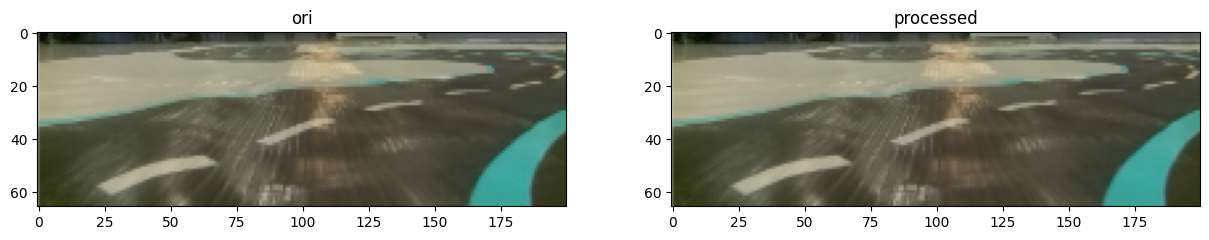

In [9]:
import cv2
def my_imread(image_path):
    #print(image_path)
    image = cv2.imread(image_path)
    return image
def img_preprocess(image):
    image = np.float32(image) / 255.    
    return image
fig, axes = plt.subplots(1,2,figsize=(15,10))
image_ori = my_imread(image_paths[image_index])
image_processed = img_preprocess(image_ori)
axes[0].imshow(image_ori)
axes[0].set_title("ori")
axes[1].imshow(image_processed)
axes[1].set_title("processed")
print(image_ori.shape)

In [10]:
def neural_net():
    model = Sequential()
    model.add(Conv2D(16, (5,5), input_shape=(66,200,3), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (5,5), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (5,5), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    opt = Adam(lr=3e-5)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(loss=loss_fn, optimizer=opt)

    return model

model = neural_net()
print(model.summary())
              

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 196, 16)       1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 98, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 98, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 47, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 47, 32)        0         
_________________________________________

In [11]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        len_imgs = len(image_paths)
        #print('len_imgs', len_imgs)
        for i in range(batch_size):
            random_index = random.randint(0, len_imgs-1)
            image_path = image_paths[random_index]
            image = my_imread(image_path)
            steering_angle = steering_angles[random_index]

            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
            #print('batch_images', batch_images)
            #print('batch_steering_angles', batch_steering_angles)
        yield(np.asarray(batch_images), np.asarray(batch_steering_angles))

4892
2


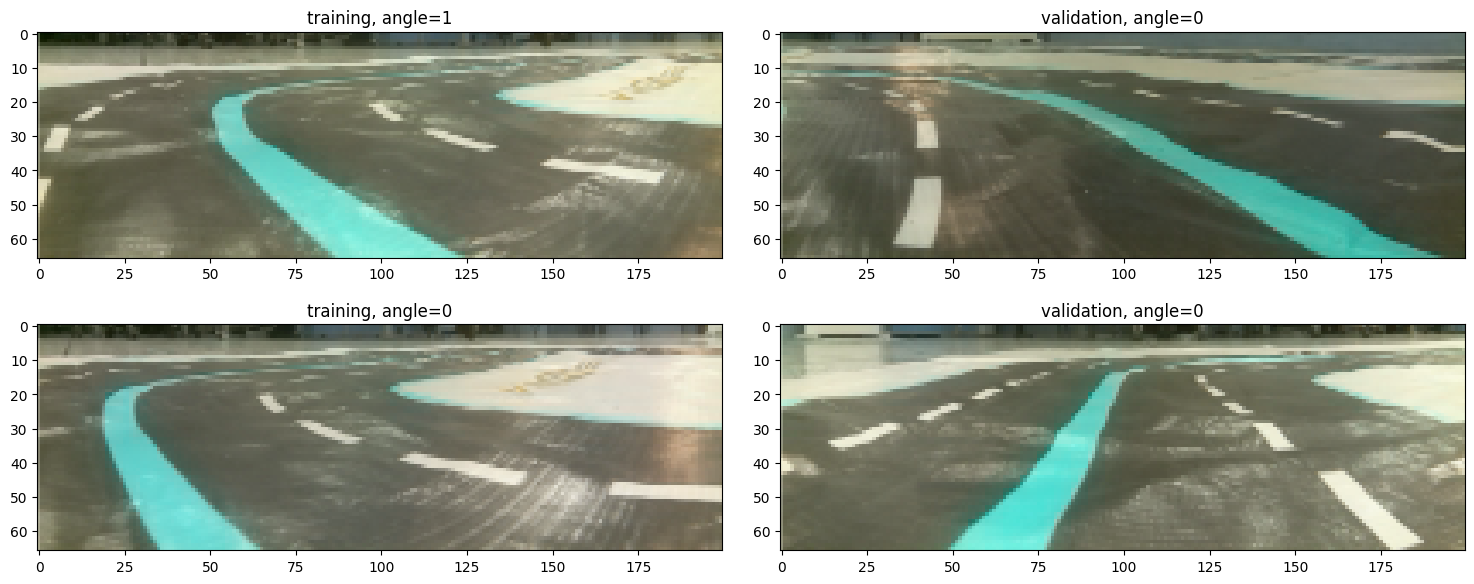

In [12]:
ncol = 2
nrow = 2

print(len(X_train))
#print(len(y_train))

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

print(len(X_train_batch))
fig, axes = plt.subplots(nrow, ncol, figsize=(15,6))
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle={}".format(y_train_batch[i]))
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle={}".format(y_valid_batch[i]))


In [13]:
import datetime 
save_dir = datetime.datetime.now().strftime('%Y%m%d_%H%M')
model_output_dir = os.path.join(save_dir)
os.mkdir(model_output_dir)
print('model_output_dir ', model_output_dir)

model_output_dir  20251203_1657


In [14]:
train_bSize = 20
valid_bSize = 100
checkpoint = 'lane_navigation_'+ save_dir + '.h5'
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir, checkpoint),\
                                                                 verbose=1, \
                                                                 save_best_only=True)
history = model.fit_generator(image_data_generator(X_train, y_train, batch_size=train_bSize), \
                              steps_per_epoch=len(X_train)/train_bSize,\
                              epochs=100, \
                              validation_data=image_data_generator(X_valid, y_valid, batch_size=valid_bSize), \
                              validation_steps=len(X_valid)/valid_bSize, \
                              verbose=1, \
                              shuffle=1, \
                              callbacks=[checkpoint_callback])
#model.save(os.path.join(model_output_dir, checkpoint))
history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

Epoch 1/100
 13/244 [>.............................] - ETA: 1:00 - loss: 0.9966
Epoch 00001: val_loss improved from inf to 1.05930, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245/244 [==============================] - 42s 171ms/step - loss: 1.0439 - val_loss: 1.0593
Epoch 2/100
 13/244 [>.............................] - ETA: 38s - loss: 0.9641
Epoch 00002: val_loss improved from 1.05930 to 1.02480, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245/244 [==============================] - 31s 125ms/step - loss: 0.8641 - val_loss: 1.0248
Epoch 3/100
 13/244 [>.............................] - ETA: 35s - loss: 0.9685
Epoch 00003: val_loss did not improve from 1.02480
245/244 [==============================] - 30s 122ms/step - loss: 0.8397 - val_loss: 1.0295
Epoch 4/100
 13/244 [>.............................] - ETA: 38s - loss: 0.9269
Epoch 00004: val_loss improved from 1.02480 to 0.98530, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245

 13/244 [>.............................] - ETA: 26s - loss: 0.6775
Epoch 00025: val_loss improved from 0.73214 to 0.72013, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245/244 [==============================] - 27s 112ms/step - loss: 0.6446 - val_loss: 0.7201
Epoch 26/100
 13/244 [>.............................] - ETA: 27s - loss: 0.7469
Epoch 00026: val_loss did not improve from 0.72013
245/244 [==============================] - 28s 115ms/step - loss: 0.6211 - val_loss: 0.7939
Epoch 27/100
 13/244 [>.............................] - ETA: 26s - loss: 0.6597
Epoch 00027: val_loss improved from 0.72013 to 0.70126, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245/244 [==============================] - 29s 118ms/step - loss: 0.6290 - val_loss: 0.7013
Epoch 28/100
 13/244 [>.............................] - ETA: 25s - loss: 0.6402
Epoch 00028: val_loss improved from 0.70126 to 0.68055, saving model to 20251203_1657\lane_navigation_20251203_1657.h5
245/244 [

Epoch 51/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5104
Epoch 00051: val_loss did not improve from 0.54108
245/244 [==============================] - 27s 110ms/step - loss: 0.4405 - val_loss: 0.5425
Epoch 52/100
 13/244 [>.............................] - ETA: 25s - loss: 0.5599
Epoch 00052: val_loss did not improve from 0.54108
245/244 [==============================] - 27s 109ms/step - loss: 0.4592 - val_loss: 0.5951
Epoch 53/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5779
Epoch 00053: val_loss did not improve from 0.54108
245/244 [==============================] - 27s 109ms/step - loss: 0.4617 - val_loss: 0.6143
Epoch 54/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5386
Epoch 00054: val_loss did not improve from 0.54108
245/244 [==============================] - 27s 110ms/step - loss: 0.4437 - val_loss: 0.5725
Epoch 55/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5817
Epoch 00055: val_loss did no

Epoch 78/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5488
Epoch 00078: val_loss did not improve from 0.44990
245/244 [==============================] - 27s 111ms/step - loss: 0.3951 - val_loss: 0.5833
Epoch 79/100
 13/244 [>.............................] - ETA: 26s - loss: 0.5849
Epoch 00079: val_loss did not improve from 0.44990
245/244 [==============================] - 29s 116ms/step - loss: 0.3841 - val_loss: 0.6217
Epoch 80/100
 13/244 [>.............................] - ETA: 28s - loss: 0.5969
Epoch 00080: val_loss did not improve from 0.44990
245/244 [==============================] - 31s 125ms/step - loss: 0.3806 - val_loss: 0.6345
Epoch 81/100
 13/244 [>.............................] - ETA: 26s - loss: 0.4804
Epoch 00081: val_loss did not improve from 0.44990
245/244 [==============================] - 30s 122ms/step - loss: 0.3878 - val_loss: 0.5106
Epoch 82/100
 13/244 [>.............................] - ETA: 27s - loss: 0.5048
Epoch 00082: val_loss did no

(66, 200, 3)
[0.8684013  0.08176214 0.04983659]
0


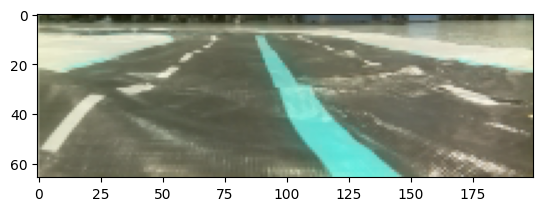

In [15]:
img_path = X_valid[0]
image = my_imread(img_path)
steering_angle = steering_angles[0]
image = img_preprocess(image)
print(image.shape)
print(model.predict(np.expand_dims(image, 0))[0])
print(np.argmax(model.predict(np.expand_dims(image, 0))[0]))
plt.imshow(image)

20251203_1657


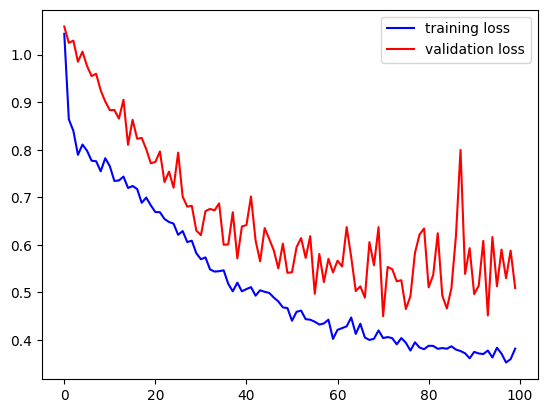

In [16]:
print(model_output_dir)

history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'rb') as f:
    history = pickle.load(f)

plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(['training loss', 'validation loss'])